# Verify points for other actors

--> Transport Levers:
      
      
      
    
--> OVerijsel
    
    
    
--> Gelderland
    
    
    
--> Environmentalist
    
    
    
--> DC?
    
    
    

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from ema_workbench import save_results
from ema_workbench import ema_logging, MultiprocessingEvaluator
from ema_workbench import Model, RealParameter, ScalarOutcome, CategoricalParameter, IntegerParameter, BooleanParameter
from ema_workbench.em_framework.samplers import sample_uncertainties
# from ema_workbench.em_framework.evaluators import MC
from dike_model_function import DikeNetwork
from problem_formulation import get_model_for_problem_formulation
ema_logging.log_to_stderr(ema_logging.INFO)

dike_model, planning_steps = get_model_for_problem_formulation(5)

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

# Transport company

In [22]:
# setup the policies
from ema_workbench import Policy
policy_dict = {'0_RfR 0':1, 
               '0_RfR 1':1,
               '0_RfR 2':1,
               '1_RfR 0':0,
               '1_RfR 1':0,
               '1_RfR 2':0,
               '2_RfR 0':0,
               '2_RfR 1':0,
               '2_RfR 2':0,
               '3_RfR 0':0,
               '3_RfR 1':0,
               '3_RfR 2':0,
               '4_RfR 0':0,
               '4_RfR 1':0,
               '4_RfR 2':0,
               'EWS_DaysToThreat':0,
               'A.1_DikeIncrease 0':0,
               'A.1_DikeIncrease 1':0,
               'A.1_DikeIncrease 2':0,
               'A.2_DikeIncrease 0':0,
               'A.2_DikeIncrease 1':0,
               'A.2_DikeIncrease 2':0,
               'A.3_DikeIncrease 0':0,
               'A.3_DikeIncrease 1':0,
               'A.3_DikeIncrease 2':0,
               'A.4_DikeIncrease 0':0,
               'A.4_DikeIncrease 1':0,
               'A.4_DikeIncrease 2':0,
               'A.5_DikeIncrease 0':0,
               'A.5_DikeIncrease 1':0,
               'A.5_DikeIncrease 2':0}

pols = Policy('RFR policy', **policy_dict)

In [23]:
print("starting")
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=100,               #500
                                            policies=pols, reporting_interval=100)


# save_results(results, './transport.tar.gz')

starting


[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [24]:
experiments, outcomes = results

In [25]:
data = pd.DataFrame.from_dict(outcomes)

In [26]:
data

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
0,1.099181e+09,0,253800000.0,0.0,2.552367
1,1.806630e+09,0,253800000.0,0.0,2.469440
2,5.551847e+08,0,253800000.0,0.0,0.557139
3,1.345027e+09,0,253800000.0,0.0,2.559457
4,1.336987e+09,0,253800000.0,0.0,1.634590
...,...,...,...,...,...
95,1.606498e+08,0,253800000.0,0.0,0.185652
96,4.547610e+08,0,253800000.0,0.0,0.582112
97,2.464230e+08,0,253800000.0,0.0,0.186876
98,1.896566e+08,0,253800000.0,0.0,0.238531


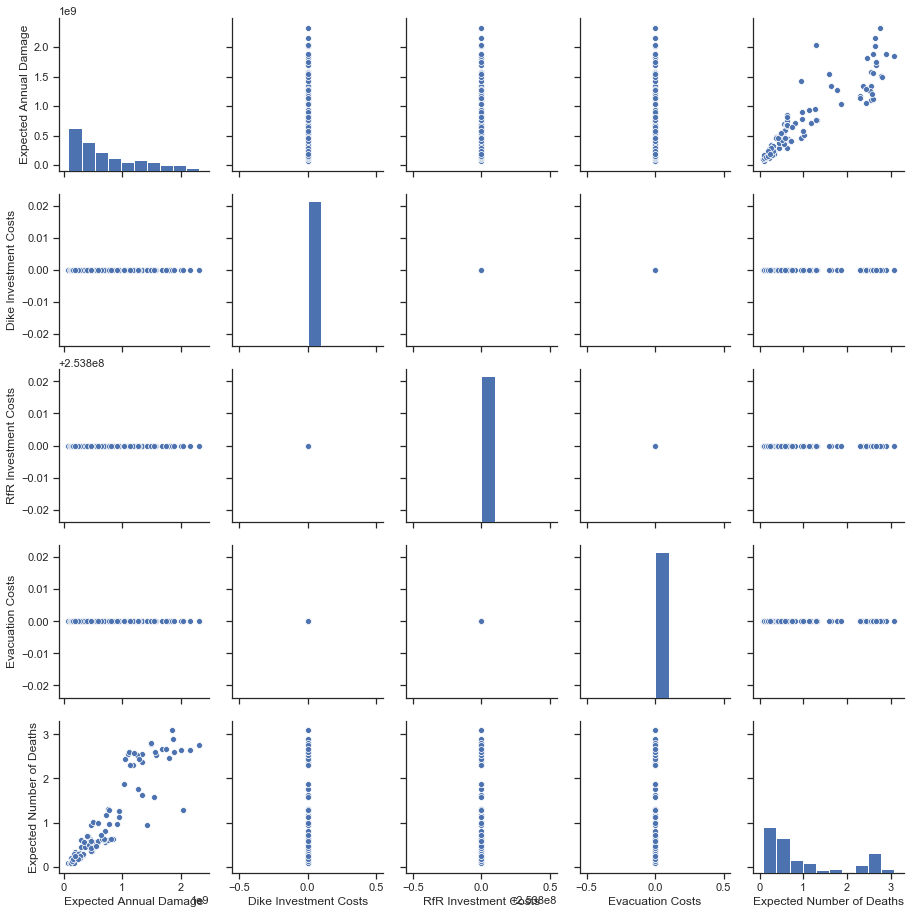

In [27]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd;

sns.pairplot(data,vars=list(outcomes.keys()), diag_kind='hist')
plt.show()

## Gelderland

In [3]:
from ema_workbench import Policy

policy_dict_gel = {'0_RfR 0':0, 
               '0_RfR 1':0,
               '0_RfR 2':0,
               '1_RfR 0':0,
               '1_RfR 1':0,
               '1_RfR 2':0,
               '2_RfR 0':0,
               '2_RfR 1':0,
               '2_RfR 2':0,
               '3_RfR 0':0,
               '3_RfR 1':0,
               '3_RfR 2':0,
               '4_RfR 0':0,
               '4_RfR 1':0,
               '4_RfR 2':0,
               'EWS_DaysToThreat':0,
               'A.1_DikeIncrease 0':7,
               'A.1_DikeIncrease 1':0,
               'A.1_DikeIncrease 2':0,
               'A.2_DikeIncrease 0':7,
               'A.2_DikeIncrease 1':0,
               'A.2_DikeIncrease 2':0,
               'A.3_DikeIncrease 0':4,
               'A.3_DikeIncrease 1':0,
               'A.3_DikeIncrease 2':0,
               'A.4_DikeIncrease 0':4,
               'A.4_DikeIncrease 1':0,
               'A.4_DikeIncrease 2':0,
               'A.5_DikeIncrease 0':3,
               'A.5_DikeIncrease 1':0,
               'A.5_DikeIncrease 2':0}

pols_gel = Policy('Preferred_policy_Gel', **policy_dict_gel)

In [4]:
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios = 1000,               #500
                                            policies=pols_gel, reporting_interval=100)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [5]:
save_results(results, './Gelderland.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\teres\Documents\EPA1361-Model-based Decison Making\EPA1361\final assignment\Gelderland.tar.gz


# as per request

In [ ]:
# setup the policies
from ema_workbench import Policy
policy_dict_base_request = {'0_RfR 0':1, 
               '0_RfR 1':1,
               '0_RfR 2':1,
               '1_RfR 0':0,
               '1_RfR 1':0,
               '1_RfR 2':0,
               '2_RfR 0':0,
               '2_RfR 1':0,
               '2_RfR 2':0,
               '3_RfR 0':0,
               '3_RfR 1':0,
               '3_RfR 2':0,
               '4_RfR 0':0,
               '4_RfR 1':0,
               '4_RfR 2':0,
               'EWS_DaysToThreat':0,
               'A.1_DikeIncrease 0':0,
               'A.1_DikeIncrease 1':0,
               'A.1_DikeIncrease 2':0,
               'A.2_DikeIncrease 0':0,
               'A.2_DikeIncrease 1':0,
               'A.2_DikeIncrease 2':0,
               'A.3_DikeIncrease 0':0,
               'A.3_DikeIncrease 1':0,
               'A.3_DikeIncrease 2':0,
               'A.4_DikeIncrease 0':0,
               'A.4_DikeIncrease 1':0,
               'A.4_DikeIncrease 2':0,
               'A.5_DikeIncrease 0':0,
               'A.5_DikeIncrease 1':0,
               'A.5_DikeIncrease 2':0}
policy_dict_base_request_2 = {'0_RfR 0':0, 
               '0_RfR 1':0,
               '0_RfR 2':0,
               '1_RfR 0':0,
               '1_RfR 1':0,
               '1_RfR 2':0,
               '2_RfR 0':0,
               '2_RfR 1':0,
               '2_RfR 2':0,
               '3_RfR 0':1,
               '3_RfR 1':1,
               '3_RfR 2':1,
               '4_RfR 0':0,
               '4_RfR 1':0,
               '4_RfR 2':0,
               'EWS_DaysToThreat':0,
               'A.1_DikeIncrease 0':0,
               'A.1_DikeIncrease 1':0,
               'A.1_DikeIncrease 2':0,
               'A.2_DikeIncrease 0':0,
               'A.2_DikeIncrease 1':0,
               'A.2_DikeIncrease 2':0,
               'A.3_DikeIncrease 0':0,
               'A.3_DikeIncrease 1':0,
               'A.3_DikeIncrease 2':0,
               'A.4_DikeIncrease 0':0,
               'A.4_DikeIncrease 1':0,
               'A.4_DikeIncrease 2':0,
               'A.5_DikeIncrease 0':0,
               'A.5_DikeIncrease 1':0,
               'A.5_DikeIncrease 2':0}
pols_request = [Policy('RFR policy 1', **policy_dict_request), Policy('RFR policy 4', **policy_dict_request_2) ]

In [ ]:
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios = 1000,               #500
                                            policies=pols_request, reporting_interval=100)